### Definition of Success: If the revenue exceeds the budget by a certain threshold (e.g., 20%), the movie is considered a success.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Based on our definition for success, we will have the following threshold
threshold = 1.2

In [3]:
movies_df = pd.read_csv('../data/processed/movies_cleaned.csv')
len(movies_df)

44691

In [4]:
movies_df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,Thriller,Music,Mystery,Fantasy,Action,Family,Documentary,Comedy,Western,Animation
0,862,Toy Story,NaN,1995-10-30,"['Animation', 'Comedy', 'Family']",Toy Story Collection,en,30.0,165.498603,['Pixar Animation Studios'],...,0,0,0,0,0,1,0,1,0,1
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,"['Adventure', 'Fantasy', 'Family']",NaN,en,59.5,165.498603,"['TriStar Pictures', 'Teitler Film', 'Intersco...",...,0,0,0,1,0,1,0,0,0,0
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,"['Romance', 'Comedy']",Grumpy Old Men Collection,en,NaN,NaN,"['Warner Bros.', 'Lancaster Gate']",...,0,0,0,0,0,0,0,1,0,0
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,"['Comedy', 'Drama', 'Romance']",NaN,en,16.0,81.452156,['Twentieth Century Fox Film Corporation'],...,0,0,0,0,0,0,0,1,0,0
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,['Comedy'],Father of the Bride Collection,en,NaN,76.578911,"['Sandollar Productions', 'Touchstone Pictures']",...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Check for missing values
movies_df.isnull().sum()

id                           0
title                        0
tagline                  24407
release_date                34
genres                       0
belongs_to_collection    40228
original_language           10
budget_musd              35837
revenue_musd             37306
production_companies     11335
production_countries      5856
vote_count                   0
vote_average              2614
popularity                   0
runtime                   1512
overview                   951
spoken_languages          3597
poster_path                224
cast                      2189
cast_size                    0
crew_size                    0
director                   731
release_year                34
Unnamed: 23                  0
Drama                        0
History                      0
Adventure                    0
Foreign                      0
TV Movie                     0
Science Fiction              0
War                          0
Crime                        0
Horror  

In [6]:
# Let's create a new column 'success' that will be 1 if the movie revenue is at least 20% higher than the budget, and 0 otherwise
movies_df['success'] = movies_df.apply(lambda x: 1 if x['revenue_musd'] > threshold * x['budget_musd'] else 0, axis=1)
# movies_df = movies_df.dropna(subset=['success'])  # Drop rows where success column is NaN (if any)

In [7]:
# Check for missing values
movies_df.isnull().sum()

id                           0
title                        0
tagline                  24407
release_date                34
genres                       0
belongs_to_collection    40228
original_language           10
budget_musd              35837
revenue_musd             37306
production_companies     11335
production_countries      5856
vote_count                   0
vote_average              2614
popularity                   0
runtime                   1512
overview                   951
spoken_languages          3597
poster_path                224
cast                      2189
cast_size                    0
crew_size                    0
director                   731
release_year                34
Unnamed: 23                  0
Drama                        0
History                      0
Adventure                    0
Foreign                      0
TV Movie                     0
Science Fiction              0
War                          0
Crime                        0
Horror  

In [8]:
# Fill missing values or drop them based on the column
movies_df['budget_musd'] = movies_df['budget_musd'].fillna(movies_df['budget_musd'].median())  # Filling NaN with median value
movies_df['revenue_musd'] = movies_df['revenue_musd'].fillna(movies_df['revenue_musd'].median())  # Same for revenue

In [9]:
# Check for missing values
movies_df.isnull().sum()

id                           0
title                        0
tagline                  24407
release_date                34
genres                       0
belongs_to_collection    40228
original_language           10
budget_musd                  0
revenue_musd                 0
production_companies     11335
production_countries      5856
vote_count                   0
vote_average              2614
popularity                   0
runtime                   1512
overview                   951
spoken_languages          3597
poster_path                224
cast                      2189
cast_size                    0
crew_size                    0
director                   731
release_year                34
Unnamed: 23                  0
Drama                        0
History                      0
Adventure                    0
Foreign                      0
TV Movie                     0
Science Fiction              0
War                          0
Crime                        0
Horror  

In [10]:
# Drop irrelevant columns
movies_df = movies_df.drop(columns=['Unnamed: 23', 'id', 'title', 'tagline', 'overview', 'poster_path', 'cast', 
                                    'belongs_to_collection', 'production_companies', 'production_countries', 'original_language',
                                    'release_date', 'genres', 'spoken_languages', 'director'])

In [11]:
movies_df = movies_df.dropna()  # Drop rows with missing values

In [12]:
# Check for missing values
movies_df.isnull().sum()

budget_musd        0
revenue_musd       0
vote_count         0
vote_average       0
popularity         0
runtime            0
cast_size          0
crew_size          0
release_year       0
Drama              0
History            0
Adventure          0
Foreign            0
TV Movie           0
Science Fiction    0
War                0
Crime              0
Horror             0
Romance            0
Thriller           0
Music              0
Mystery            0
Fantasy            0
Action             0
Family             0
Documentary        0
Comedy             0
Western            0
Animation          0
success            0
dtype: int64

In [13]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Define feature columns (X) and target column (y)
X = movies_df.drop(columns=['success'])
y = movies_df['success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9594412449454723
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      7433
           1       0.90      0.61      0.73       728

    accuracy                           0.96      8161
   macro avg       0.93      0.80      0.85      8161
weighted avg       0.96      0.96      0.96      8161

Confusion Matrix:
 [[7385   48]
 [ 283  445]]


### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9854184536208798
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7433
           1       0.95      0.88      0.91       728

    accuracy                           0.99      8161
   macro avg       0.97      0.94      0.95      8161
weighted avg       0.99      0.99      0.99      8161

Confusion Matrix:
 [[7402   31]
 [  88  640]]


### Grid Search Example (for Random Forest)

In [16]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9873789976718539
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7433
           1       0.97      0.89      0.93       728

    accuracy                           0.99      8161
   macro avg       0.98      0.94      0.96      8161
weighted avg       0.99      0.99      0.99      8161



### Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Accuracy: 0.9963239799044235
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7433
           1       0.98      0.97      0.98       728

    accuracy                           1.00      8161
   macro avg       0.99      0.99      0.99      8161
weighted avg       1.00      1.00      1.00      8161

Confusion Matrix:
 [[7422   11]
 [  19  709]]


### Hyperparameter Tuning with GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],          # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],   # Learning rate (step size)
    'max_depth': [3, 5, 7],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]       # Minimum number of samples required to split a node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_gb_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_gb = best_gb_model.predict(X_test)
print("Accuracy (Best Model):", accuracy_score(y_test, y_pred_best_gb))
print("Classification Report (Best Model):\n", classification_report(y_test, y_pred_best_gb))
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best_gb))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy (Best Model): 0.9975493199362823
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7433
           1       0.99      0.98      0.99       728

    accuracy                           1.00      8161
   macro avg       0.99      0.99      0.99      8161
weighted avg       1.00      1.00      1.00      8161

Confusion Matrix (Best Model):
 [[7424    9]
 [  11  717]]


In [19]:
# Get feature importance
importances = best_gb_model.feature_importances_

# Create a DataFrame to show feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance_df.head())

        Feature  Importance
1  revenue_musd    0.753639
0   budget_musd    0.241861
8  release_year    0.000725
6     cast_size    0.000554
3  vote_average    0.000513


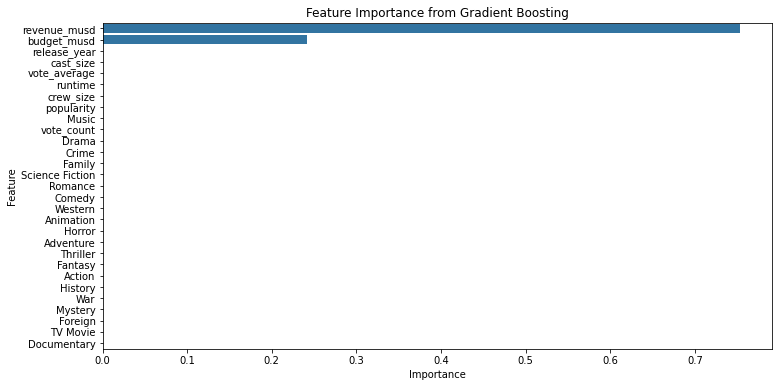

In [20]:
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Gradient Boosting')
plt.show()